# Clasificación por red neuronal


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
#Importamos los paquetes necesarios para crear nuestra red neuranal

X = pickle.load(open("X.pic","rb"))
y = pickle.load(open("y.pic","rb"))
y=np.array(y)

#Cargamos los datos usando la función pickle

X=X/255.0 #normalizamos los datos para que los valores se encuentren entre 0 y 1

2021-12-14 05:14:05.164600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-14 05:14:05.164615: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Creamos nuestra red neuronal, añadiendo las capas, incluyendo funciones de activación

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
                    
model.add(Flatten())
model.add(Dense(64))
                    
model.add(Dense(1))
model.add(Activation('sigmoid'))
                    
          
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
          
model.fit(X, y, batch_size=32, epochs=7, validation_split=0.1) #entrenamos nuestro modelo con los datos que importamos 
#Nota: para este modelo el valor de Epocas (epoch) con mejor resultado y menor perdida de validez es 7

#referencias:https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/

2021-12-14 05:14:06.386058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-14 05:14:06.386351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-14 05:14:06.386408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-12-14 05:14:06.386446: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-12-14 05:14:06.386482: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/7
23/23 [==============================] - 2s 87ms/step - loss: 0.7550 - accuracy: 0.4980 - val_loss: 0.6903 - val_accuracy: 0.5244
Epoch 2/7
23/23 [==============================] - 2s 81ms/step - loss: 0.6783 - accuracy: 0.5741 - val_loss: 0.6525 - val_accuracy: 0.6098
Epoch 3/7
23/23 [==============================] - 2s 81ms/step - loss: 0.6465 - accuracy: 0.6177 - val_loss: 0.6053 - val_accuracy: 0.5976
Epoch 4/7
23/23 [==============================] - 2s 80ms/step - loss: 0.5771 - accuracy: 0.6966 - val_loss: 0.5412 - val_accuracy: 0.7317
Epoch 5/7
23/23 [==============================] - 2s 78ms/step - loss: 0.5065 - accuracy: 0.7497 - val_loss: 0.5023 - val_accuracy: 0.7683
Epoch 6/7
23/23 [==============================] - 2s 82ms/step - loss: 0.4464 - accuracy: 0.7782 - val_loss: 0.4768 - val_accuracy: 0.7561
Epoch 7/7
23/23 [==============================] - 2s 82ms/step - loss: 0.4027 - accuracy: 0.8218 - val_loss: 0.4911 - val_accuracy: 0.7073


# Clasificación mediante KNeighbors y PCA


In [3]:
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image, ImageFilter
import pickle
import mglearn
from sklearn.model_selection import train_test_split

#importamos los modulos necesarios para el análisis
#Los datos los hemos importado y normalizado previamente, asi que los usaremos de nuevo
#Referencias: "Introduction to machine learning with python," Andreas C. Müller & Sarah Guido.

In [4]:
#Separamos nuestros datos para entrenamientos y pruebas
X_train, X_test, y_train, y_test = train_test_split(
X, y, stratify=y, random_state=0)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])#Hay que cambiar la forma de estos arreglos para realizar el análisis
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
#Construimos el clasificador
knn = KNeighborsClassifier(n_neighbors=1)
#Lo entrenamos con nuestros datos
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test))) #imprimimos el resultado

Test set score of 1-nn: 0.62


In [5]:
#Ahora redefinimos nuestros conjuntos de entrenamiento y prueba usando PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#Volvemos a entrenar el modelo
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.64


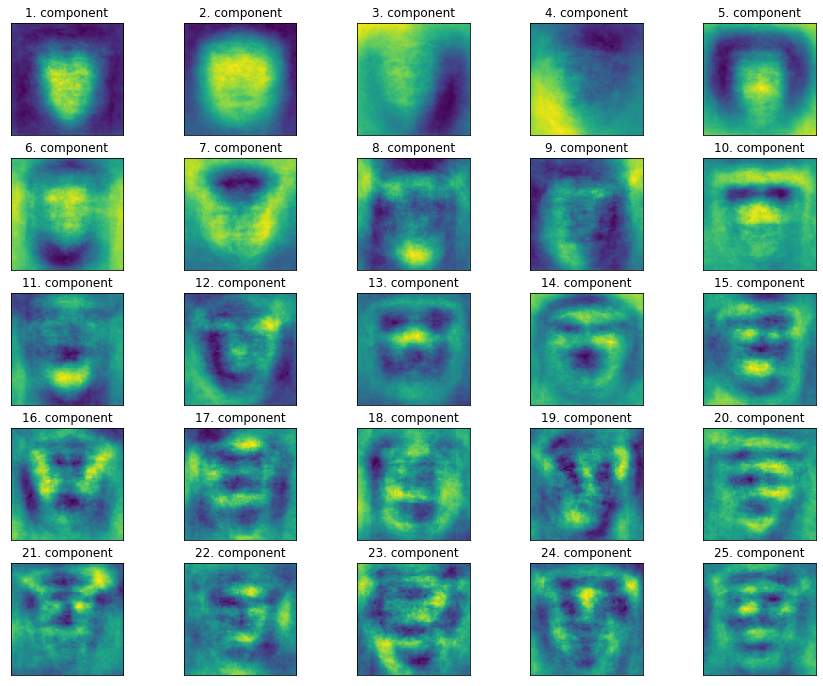

In [8]:
#Tambien podemos extraer las componentes de nuestros datos
image_shape = (64,64)
fix, axes = plt.subplots(5, 5, figsize=(15, 12), #extraemos las primeras 25 componentes
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))